# Install dependencies

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


pip install opencv-python

# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Get Data.
### This notebook is tested with Mnist Dataset

In [2]:
data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

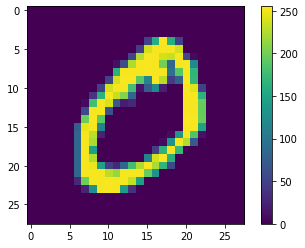

In [3]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

### Plot Data and Define classnames for the data

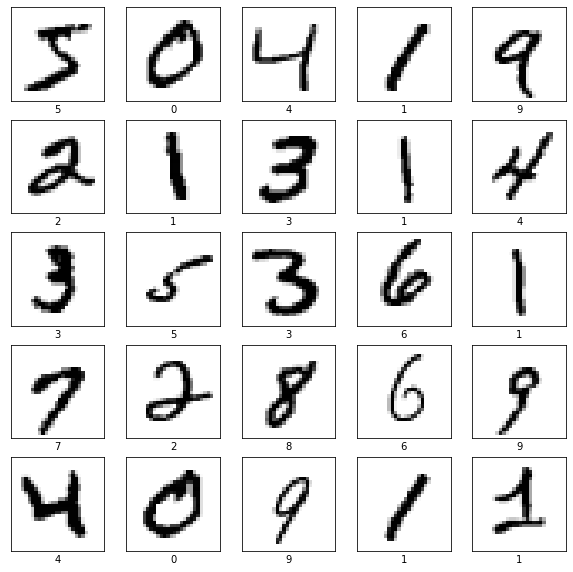

In [4]:
class_names = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Resize the Images to 28x 28 and convert them to grayscale (not required for Fashion Mnist data and Mnist data)

In [ ]:
# the list of data (i.e., images) and class images
print("[INFO] loading and resizing training images...")
data = []
# loop over the image paths
for img in train_images:
    image = cv2.resize(img, (28, 28))
#     print(image.shape)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    data.append(gray)
train_images = np.array(data)

### Normalise the Images

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
print(train_labels[0], train_images[0].shape, len(train_images))
data_shape = train_images[0].shape

5 (28, 28) 60000


### Plot the grayscale resized Images

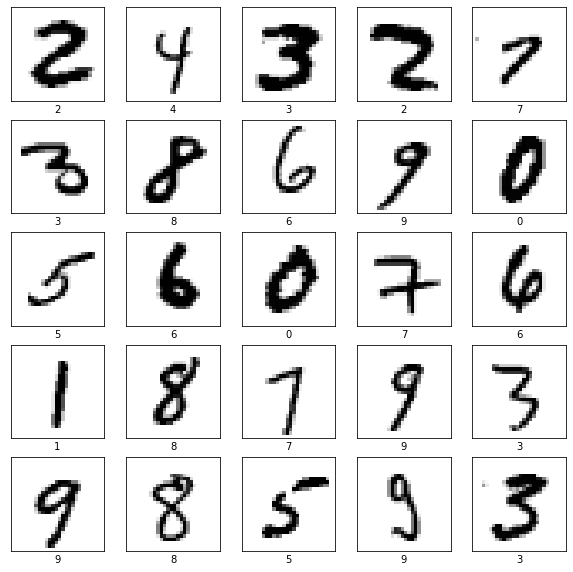

In [8]:
plt.figure(figsize=(10,10))
j = 0
for i in range(25,50):
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    j = j +1
plt.show()

# Define the model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2021-09-03 00:52:02.147116: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [12]:
model.fit(train_images, train_labels, batch_size=128, epochs=10, verbose = 2)

2021-09-03 00:52:05.968222: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2021-09-03 00:52:06.127175: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-03 00:52:06.146776: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/10
469/469 - 1s - loss: 0.3602 - accuracy: 0.9008
Epoch 2/10
469/469 - 0s - loss: 0.1663 - accuracy: 0.9529
Epoch 3/10
469/469 - 0s - loss: 0.1207 - accuracy: 0.9658
Epoch 4/10
469/469 - 0s - loss: 0.0947 - accuracy: 0.9730
Epoch 5/10
469/469 - 0s - loss: 0.0768 - accuracy: 0.9774
Epoch 6/10
469/469 - 0s - loss: 0.0644 - accuracy: 0.9816
Epoch 7/10
469/469 - 0s - loss: 0.0537 - accuracy: 0.9844
Epoch 8/10
469/469 - 1s - loss: 0.0453 - accuracy: 0.9865
Epoch 9/10
469/469 - 1s - loss: 0.0376 - accuracy: 0.9901
Epoch 10/10
469/469 - 1s - loss: 0.0325 - accuracy: 0.9909


# Save the model

In [13]:
model_name = "mnist-model.h5"
model.save(model_name)

In [27]:
ls .

'Cifar Dataset Model training.ipynb'
 cifar-model.h5
 consumer.py
'Fashion Mnist Dataset Model training.ipynb'
 final.h5
'Mnist Dataset Model training.ipynb'
 mnist-model.h5
 producer.py


# Load the model

In [15]:
from tensorflow.keras.models import load_model
model = load_model(model_name)

# Evaluate the model with the test images

### Define the last layer as softmax layer

In [16]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

2021-09-03 00:52:42.605347: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 31360000 exceeds 10% of free system memory.


In [18]:
print(predictions[0], test_labels[0])

[2.9759810e-06 2.0058103e-08 1.3988821e-05 1.1055910e-03 7.5985961e-11
 1.1975581e-07 2.5230446e-11 9.9886739e-01 1.4597259e-06 8.5650372e-06] 7


In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4864 - accuracy: 0.8385

Test accuracy: 0.8385000228881836


# Plot the Predictions

In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

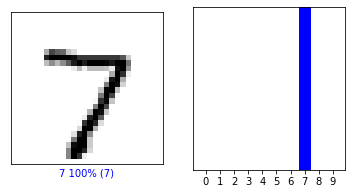

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

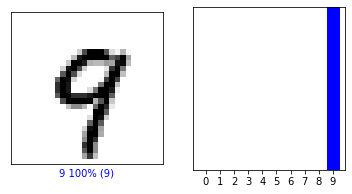

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

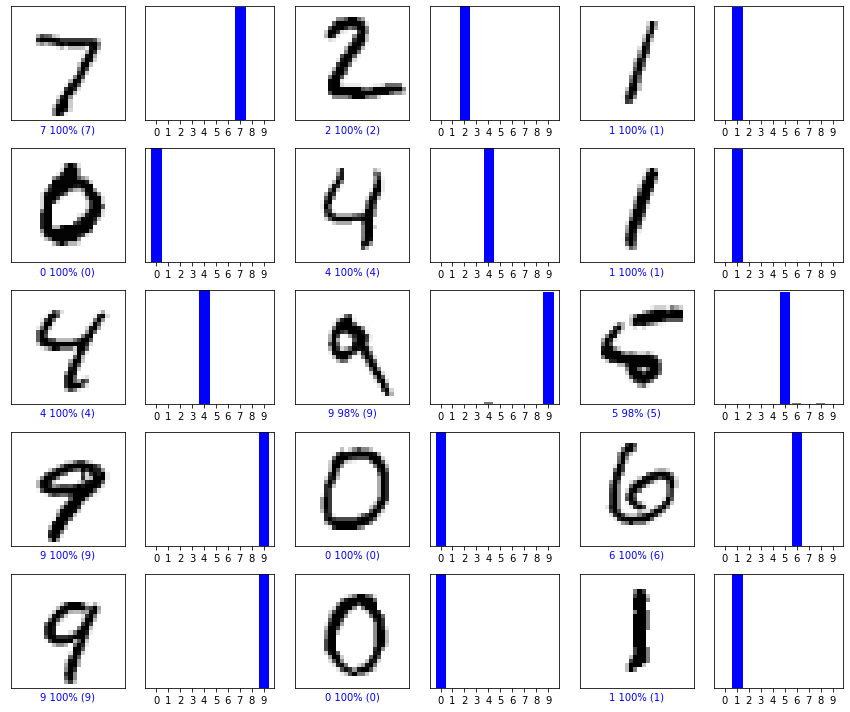

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Predict for 1 image

In [23]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [24]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [25]:
predictions_single = probability_model.predict(img)
print(predictions_single, np.argmax(predictions_single))

[[2.9019848e-10 4.4690078e-06 9.9997604e-01 1.8256405e-05 1.5665724e-14
  1.8723957e-08 2.1548996e-09 1.2399709e-13 1.1862070e-06 1.0170137e-09]] 2


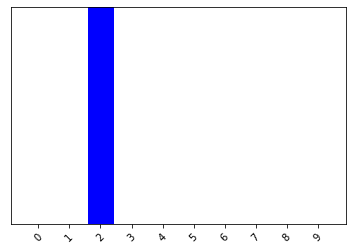

In [26]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()